# Customer Personality Analysis 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/ROHIT/anaconda3/projects/marketing_campaign.csv")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
#Data Structure
data.shape

(2240, 29)

In [4]:
#Finding the columns
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
#Data Types
data.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

# Data Cleaning

In [6]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

* Dropping Z_Revenue and Z_CostContact as they have same value throughout the data and doesnot provide any usefull insight about data. Hence dropping these features.

In [7]:
data.drop(['Z_CostContact', 'Z_Revenue'],axis=1,inplace=True)

In [8]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

* Imputing missing values for Income column

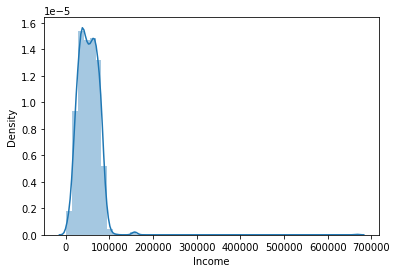

In [9]:
sns.distplot(data['Income'])
plt.show()

In [10]:
data['Income'] = data['Income'].fillna(data['Income'].mean())

* Creating new columns for total accepted offer in all campaigns

In [11]:
data['Campaign_accepted']=data['AcceptedCmp1']+data['AcceptedCmp2']+data['AcceptedCmp3']+data['AcceptedCmp4']+data['AcceptedCmp5']+data['Response']

In [12]:
data.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Response']
        ,axis=1,inplace=True)

* Creating new columns for total amount spent on buying products from website in last 2 years

In [13]:
data['Purchase__amount']=data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

In [14]:
data.drop(['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
        ,axis=1,inplace=True)

* Creating new column for total number of purchase

In [15]:
data['Total_purchase']=data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases'] + data['NumDealsPurchases']

In [16]:
data.drop(['NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases','NumDealsPurchases'],axis=1,inplace=True)

In [17]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,NumWebVisitsMonth,Complain,Campaign_accepted,Purchase__amount,Total_purchase
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,7,0,1,1617,25
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,5,0,0,27,6
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,4,0,0,776,21
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,6,0,0,53,8
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,5,0,0,422,19


* Creating new feature age (as in 2021) using Year_Birth

In [18]:
data['Age']=2021-data['Year_Birth']

In [19]:
data.drop(['Year_Birth'],axis=1,inplace=True)

* Dividing education in 2 class

In [20]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [21]:
data['Education'] = data['Education'].replace(['PhD','2n Cycle','Graduation', 'Master'],'PG')  
data['Education'] = data['Education'].replace(['Basic'], 'UG')

* dividing marital stauts in single or not single

In [22]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [23]:
data['Marital_Status'] = data['Marital_Status'].replace(['Married', 'Together'],'Not_single')
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd'],'Single')

* Creating new column for total kids in home

In [24]:
data['total_kids']=data['Kidhome']+data['Teenhome']

In [25]:
data.drop(['Kidhome','Teenhome'],axis=1,inplace=True)

* Creating new column to show number of months the customer is using website servive

In [26]:
data['Dt_Customer']=pd.to_datetime(data['Dt_Customer'])

In [27]:
data['2021']='01-01-2021'

In [28]:
data['2021']=pd.to_datetime(data['2021'])

In [29]:
data['Customer_year']=(data['2021'].dt.year)-(data['Dt_Customer'].dt.year)

In [30]:
data.drop(['Dt_Customer','2021'],axis=1,inplace=True)

In [31]:
data.head()

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Campaign_accepted,Purchase__amount,Total_purchase,Age,total_kids,Customer_year
0,5524,PG,Single,58138.0,58,7,0,1,1617,25,64,0,9
1,2174,PG,Single,46344.0,38,5,0,0,27,6,67,2,7
2,4141,PG,Not_single,71613.0,26,4,0,0,776,21,56,0,8
3,6182,PG,Not_single,26646.0,26,6,0,0,53,8,37,1,7
4,5324,PG,Not_single,58293.0,94,5,0,0,422,19,40,1,7


# EDA

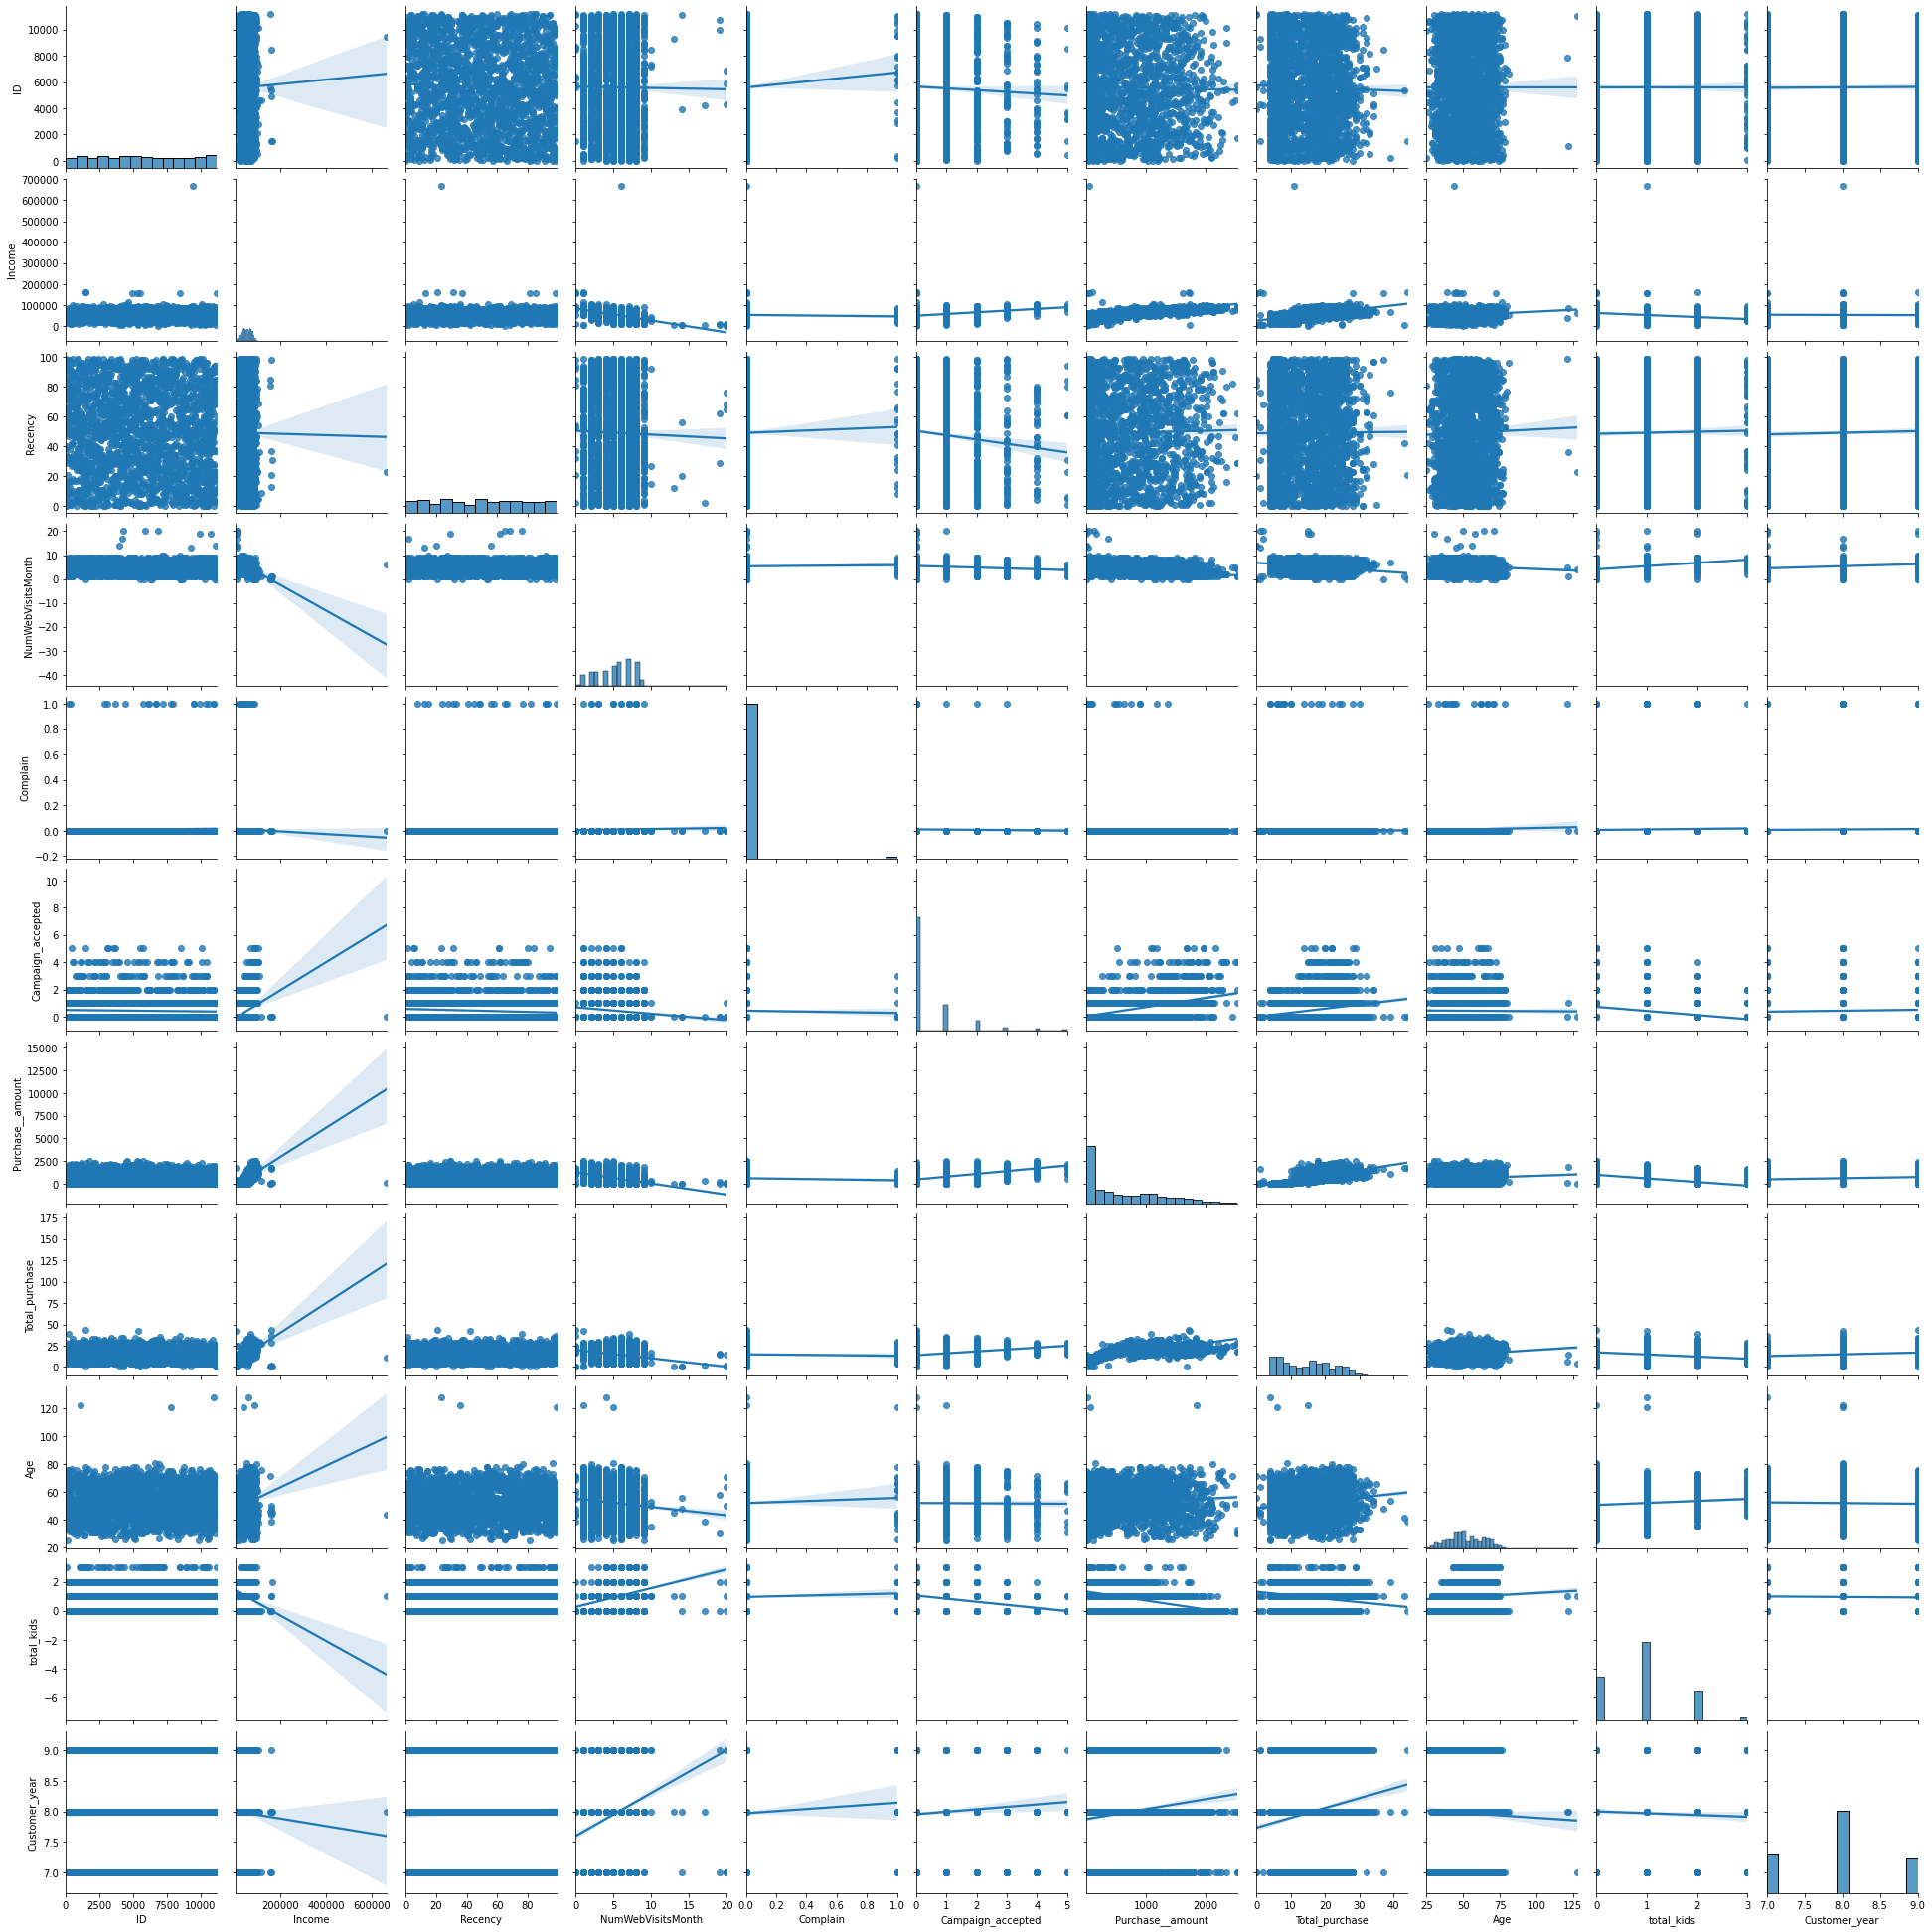

In [32]:
sns.pairplot(data,kind='reg')
plt.show()

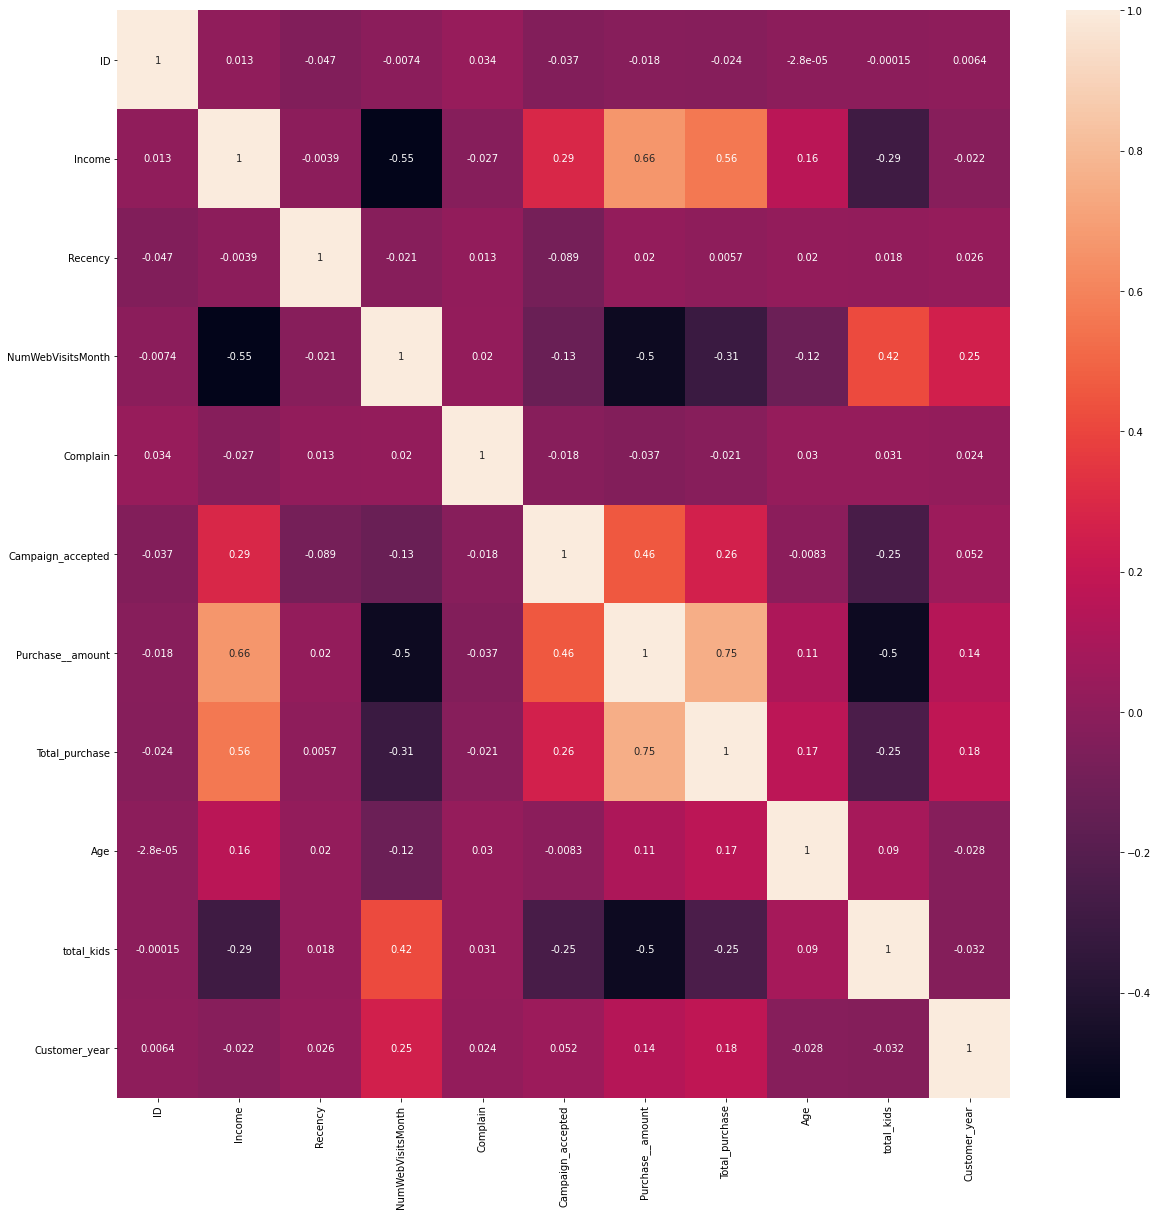

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

# Univariate analysis

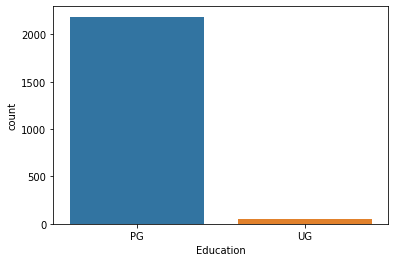

In [34]:
sns.countplot(data['Education'])
plt.show()

In [35]:
data.groupby(['Education'])['Education'].count()

Education
PG    2186
UG      54
Name: Education, dtype: int64

* Less number of UG customer

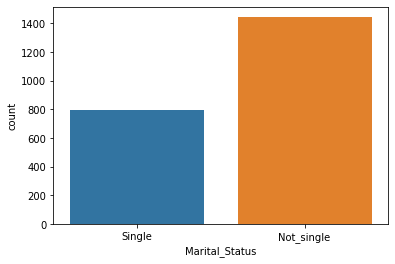

In [36]:
sns.countplot(data['Marital_Status'])
plt.show()

In [37]:
data.groupby(['Marital_Status'])['Marital_Status'].count()

Marital_Status
Not_single    1444
Single         796
Name: Marital_Status, dtype: int64

* Less number of Single customer

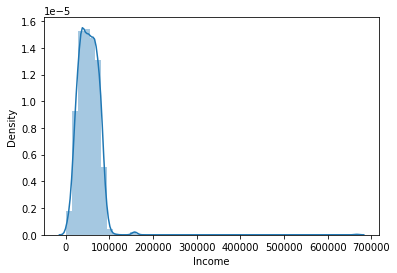

In [38]:
sns.distplot(data['Income'])
plt.show()

In [39]:
data['Income'].describe()

count      2240.000000
mean      52247.251354
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [40]:
data[data['Income']>400000]

,ID,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Campaign_accepted,Purchase__amount,Total_purchase,Age,total_kids,Customer_year
2233,9432,PG,Not_single,666666.0,23,6,0,0,62,11,44,1,8


In [41]:
data.drop(data[data['Income']>400000].index,inplace=True)

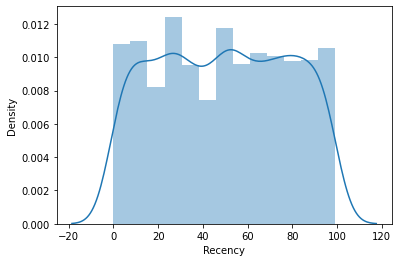

In [42]:
sns.distplot(data['Recency'])
plt.show()

In [43]:
data['Recency'].describe()

count    2239.000000
mean       49.121036
std        28.963662
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

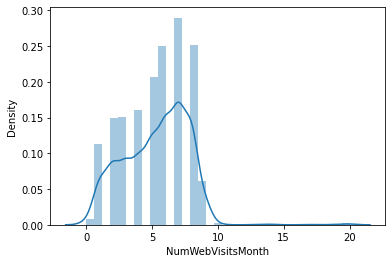

In [44]:
sns.distplot(data['NumWebVisitsMonth'])
plt.show()

In [45]:
data['NumWebVisitsMonth'].describe()

count    2239.000000
mean        5.316213
std         2.427144
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

* It is better to remove this feature because this doesnot provide any customer beahvaiour collectively.

In [46]:
data.drop(['NumWebVisitsMonth'],axis=1,inplace=True)

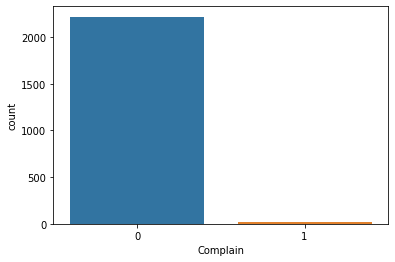

In [47]:
sns.countplot(data['Complain'])
plt.show()

In [48]:
data.groupby(['Complain'])['Complain'].count()

Complain
0    2218
1      21
Name: Complain, dtype: int64

* Very low number of complaints, hence it is better to remove from the data

In [49]:
data.drop(['Complain'],axis=1,inplace=True)

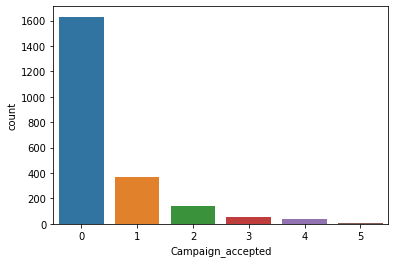

In [50]:
sns.countplot(data['Campaign_accepted'])
plt.show()

In [51]:
data.groupby(['Campaign_accepted'])['Campaign_accepted'].count()

Campaign_accepted
0    1630
1     370
2     142
3      51
4      36
5      10
Name: Campaign_accepted, dtype: int64

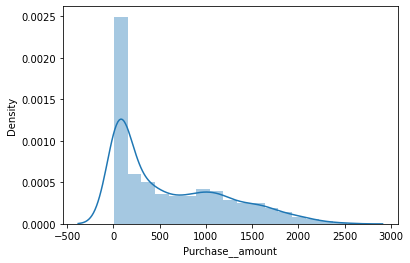

In [52]:
sns.distplot(data['Purchase__amount'])
plt.show()

In [53]:
data['Purchase__amount'].describe()

count    2239.000000
mean      606.041090
std       602.274089
min         5.000000
25%        69.000000
50%       396.000000
75%      1046.000000
max      2525.000000
Name: Purchase__amount, dtype: float64

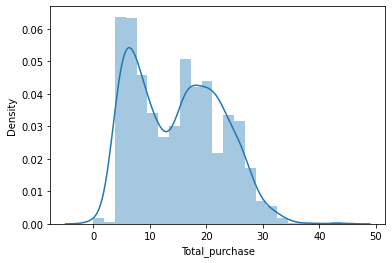

In [54]:
sns.distplot(data['Total_purchase'])
plt.show()

In [55]:
data['Total_purchase'].describe()

count    2239.000000
mean       14.863778
std         7.678453
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: Total_purchase, dtype: float64

In [56]:
data[data['Total_purchase']==0][['Total_purchase','Purchase__amount']]

,Total_purchase,Purchase__amount
655,0,6
981,0,6
1524,0,5
2132,0,8


* Well this does not make any sense that Total purchase is 0 and number of purchase is more than 0. Hence dropping these 4 entries

In [57]:
data.drop(data[(data['Total_purchase']==0) & (data['Purchase__amount']>0)].index,inplace=True)

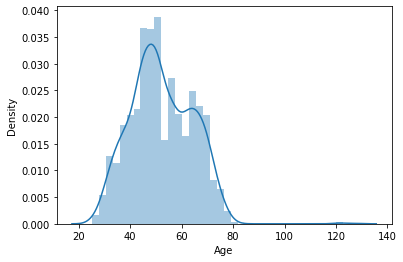

In [58]:
sns.distplot(data['Age'])
plt.show()

In [59]:
data['Age'].describe()

count    2235.000000
mean       52.191946
std        11.987584
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: Age, dtype: float64

In [60]:
data[data['Age']>95]

,ID,Education,Marital_Status,Income,Recency,Campaign_accepted,Purchase__amount,Total_purchase,Age,total_kids,Customer_year
192,7829,PG,Single,36640.0,99,0,65,6,121,1,8
239,11004,PG,Single,60182.0,23,0,22,4,128,1,7
339,1150,PG,Not_single,83532.0,36,1,1853,15,122,0,8


* This must be due error in data entry. Hence removing these 3 entries

In [61]:
data.drop(data[data['Age']>95].index,inplace=True)

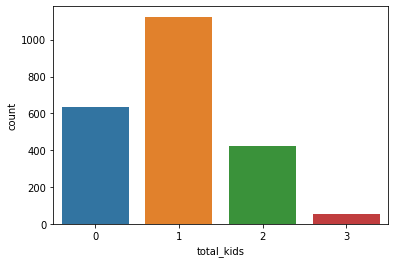

In [62]:
sns.countplot(data['total_kids'])
plt.show()

In [63]:
data.groupby(['total_kids'])['total_kids'].count()

total_kids
0     634
1    1124
2     421
3      53
Name: total_kids, dtype: int64

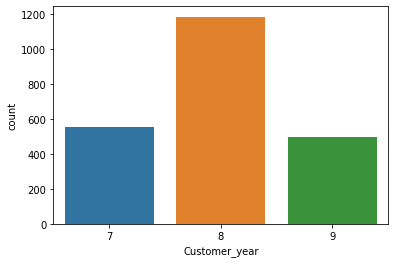

In [64]:
sns.countplot(data['Customer_year'])
plt.show()

In [65]:
data.groupby(['Customer_year'])['Customer_year'].count()

Customer_year
7     554
8    1184
9     494
Name: Customer_year, dtype: int64

# Multivariate analysis

In [66]:
data.head()

,ID,Education,Marital_Status,Income,Recency,Campaign_accepted,Purchase__amount,Total_purchase,Age,total_kids,Customer_year
0,5524,PG,Single,58138.0,58,1,1617,25,64,0,9
1,2174,PG,Single,46344.0,38,0,27,6,67,2,7
2,4141,PG,Not_single,71613.0,26,0,776,21,56,0,8
3,6182,PG,Not_single,26646.0,26,0,53,8,37,1,7
4,5324,PG,Not_single,58293.0,94,0,422,19,40,1,7


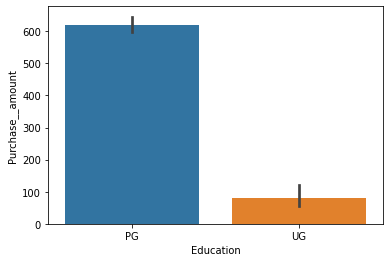

In [67]:
sns.barplot(data['Education'],data['Purchase__amount'])
plt.show()

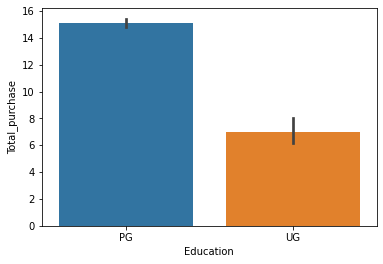

In [68]:
sns.barplot(data['Education'],data['Total_purchase'])
plt.show()

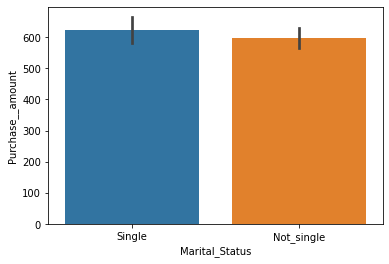

In [69]:
sns.barplot(data['Marital_Status'],data['Purchase__amount'])
plt.show()

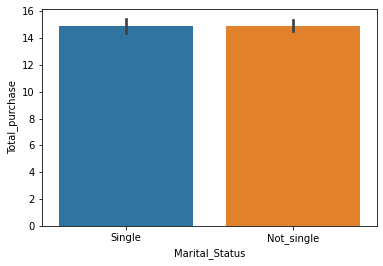

In [70]:
sns.barplot(data['Marital_Status'],data['Total_purchase'])
plt.show()

* Total expense and total purachase for Single and not signle are about eqaul.

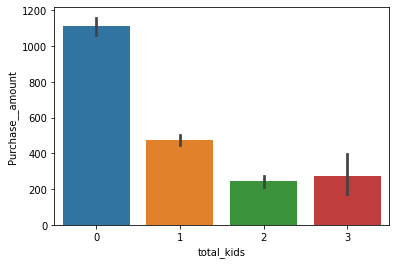

In [71]:
sns.barplot(data['total_kids'],data['Purchase__amount'])
plt.show()

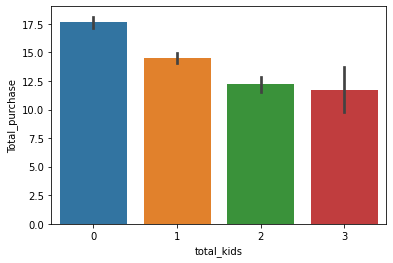

In [72]:
sns.barplot(data['total_kids'],data['Total_purchase'])
plt.show()

Customer with 0 kids spent more on purchasing.

In [73]:
from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()

In [74]:
String=[ 'Education', 'Marital_Status']

In [75]:
for i in String:
    data[i]=encoder.fit_transform(data[i])

In [76]:
data.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Recency',
       'Campaign_accepted', 'Purchase__amount', 'Total_purchase', 'Age',
       'total_kids', 'Customer_year'],
      dtype='object')

In [77]:
data

,ID,Education,Marital_Status,Income,Recency,Campaign_accepted,Purchase__amount,Total_purchase,Age,total_kids,Customer_year
0,5524,0,1,58138.0,58,1,1617,25,64,0,9
1,2174,0,1,46344.0,38,0,27,6,67,2,7
2,4141,0,0,71613.0,26,0,776,21,56,0,8
3,6182,0,0,26646.0,26,0,53,8,37,1,7
4,5324,0,0,58293.0,94,0,422,19,40,1,7
...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,0,0,61223.0,46,0,1341,18,54,1,8
2236,4001,0,0,64014.0,56,1,444,22,75,3,7
2237,7270,0,1,56981.0,91,1,1241,19,40,0,7
2238,8235,0,0,69245.0,8,0,843,23,65,1,7


In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_data = sc.fit_transform(data[['Education', 'Marital_Status', 'Income', 'Recency',
       'Campaign_accepted', 'Purchase__amount', 'Total_purchase', 'Age',
       'total_kids', 'Customer_year']])

In [79]:
scaled_data

array([[-0.15745916,  1.3497202 ,  0.29434016, ...,  1.01725156,
        -1.26620622,  1.49975849],
       [-0.15745916,  1.3497202 , -0.2632337 , ...,  1.27361274,
         1.39372063, -1.42123711],
       [-0.15745916, -0.7408943 ,  0.93138508, ...,  0.33362176,
        -1.26620622,  0.03926069],
       ...,
       [-0.15745916,  1.3497202 ,  0.23964176, ..., -1.03363785,
        -1.26620622, -1.42123711],
       [-0.15745916, -0.7408943 ,  0.81943537, ...,  1.10270529,
         0.06375721, -1.42123711],
       [-0.15745916, -0.7408943 ,  0.0452426 , ...,  1.27361274,
         1.39372063,  1.49975849]])

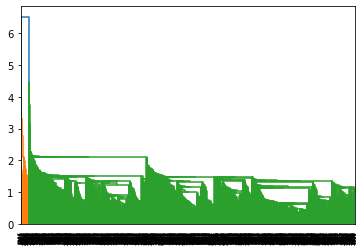

In [80]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dendrogram = sch.dendrogram(sch.linkage(scaled_data))

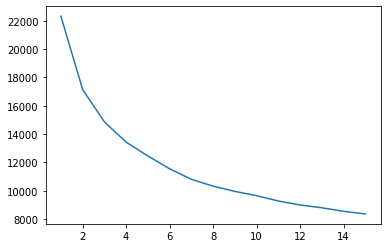

In [81]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,16), wcss)

In [82]:
#K means

In [83]:
# for normal data
model_new=KMeans(n_clusters=3)
model_new.fit_predict(data)

array([2, 2, 1, ..., 2, 1, 2])

In [84]:
b=model_new.labels_

In [85]:
Clusters_d = pd.DataFrame(b,columns=['cluster'])
data_f1 = pd.DataFrame(np.hstack([data,Clusters_d]))
data_f1

,0,1,2,3,4,5,6,7,8,9,10,11
0,5524.0,0.0,1.0,58138.0,58.0,1.0,1617.0,25.0,64.0,0.0,9.0,2.0
1,2174.0,0.0,1.0,46344.0,38.0,0.0,27.0,6.0,67.0,2.0,7.0,2.0
2,4141.0,0.0,0.0,71613.0,26.0,0.0,776.0,21.0,56.0,0.0,8.0,1.0
3,6182.0,0.0,0.0,26646.0,26.0,0.0,53.0,8.0,37.0,1.0,7.0,0.0
4,5324.0,0.0,0.0,58293.0,94.0,0.0,422.0,19.0,40.0,1.0,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2227,10870.0,0.0,0.0,61223.0,46.0,0.0,1341.0,18.0,54.0,1.0,8.0,2.0
2228,4001.0,0.0,0.0,64014.0,56.0,1.0,444.0,22.0,75.0,3.0,7.0,2.0
2229,7270.0,0.0,1.0,56981.0,91.0,1.0,1241.0,19.0,40.0,0.0,7.0,2.0
2230,8235.0,0.0,0.0,69245.0,8.0,0.0,843.0,23.0,65.0,1.0,7.0,1.0


In [86]:

data_f1.columns = ['ID', 'Education', 'Marital_Status', 'Income', 'Recency',
       'Campaign_accepted', 'Purchase__amount', 'Total_purchase', 'Age',
       'total_kids', 'Customer_year', 'clusters']

In [87]:
data_f1

,ID,Education,Marital_Status,Income,Recency,Campaign_accepted,Purchase__amount,Total_purchase,Age,total_kids,Customer_year,clusters
0,5524.0,0.0,1.0,58138.0,58.0,1.0,1617.0,25.0,64.0,0.0,9.0,2.0
1,2174.0,0.0,1.0,46344.0,38.0,0.0,27.0,6.0,67.0,2.0,7.0,2.0
2,4141.0,0.0,0.0,71613.0,26.0,0.0,776.0,21.0,56.0,0.0,8.0,1.0
3,6182.0,0.0,0.0,26646.0,26.0,0.0,53.0,8.0,37.0,1.0,7.0,0.0
4,5324.0,0.0,0.0,58293.0,94.0,0.0,422.0,19.0,40.0,1.0,7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2227,10870.0,0.0,0.0,61223.0,46.0,0.0,1341.0,18.0,54.0,1.0,8.0,2.0
2228,4001.0,0.0,0.0,64014.0,56.0,1.0,444.0,22.0,75.0,3.0,7.0,2.0
2229,7270.0,0.0,1.0,56981.0,91.0,1.0,1241.0,19.0,40.0,0.0,7.0,2.0
2230,8235.0,0.0,0.0,69245.0,8.0,0.0,843.0,23.0,65.0,1.0,7.0,1.0


In [88]:
data_f1.groupby(['clusters'])['clusters'].count()

clusters
0.0    741
1.0    686
2.0    805
Name: clusters, dtype: int64

<AxesSubplot:>

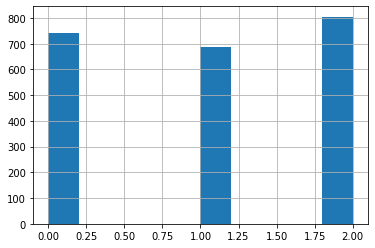

In [89]:
(data_f1["clusters"]).hist()

<AxesSubplot:xlabel='Recency', ylabel='Purchase__amount'>

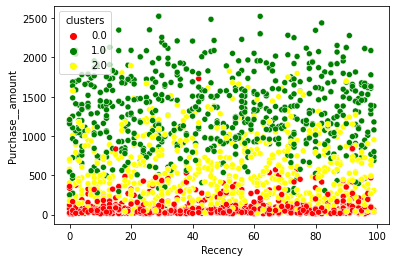

In [90]:
sns.scatterplot(data=data_f1,x="Recency",y="Purchase__amount",hue="clusters",palette=['red', 'green', 'yellow'])

In [91]:
A=data_f1[(data_f1.clusters==0)]
A["Income"].mean()

28450.8326585695

In [92]:
B=data_f1[(data_f1.clusters==1)]
B["Income"].mean()

76693.33527696793

In [93]:
C=data_f1[(data_f1.clusters==2)]
C["Income"].mean()
# cluster 3 has most high purchase amount buyers

52389.95904657264

In [94]:
D=data_f1[(data_f1.clusters==3)]
D["Purchase__amount"].mean()

nan

In [95]:
#dbscan

In [96]:
from sklearn.cluster import DBSCAN
model_db = DBSCAN(eps=0.8,min_samples=12)
model_db.fit_predict(data)

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [97]:
Clusters_db = pd.DataFrame(model_db.labels_,columns=['cluster'])
data_db = pd.DataFrame(np.hstack([data,Clusters_db]))
data_db

,0,1,2,3,4,5,6,7,8,9,10,11
0,5524.0,0.0,1.0,58138.0,58.0,1.0,1617.0,25.0,64.0,0.0,9.0,-1.0
1,2174.0,0.0,1.0,46344.0,38.0,0.0,27.0,6.0,67.0,2.0,7.0,-1.0
2,4141.0,0.0,0.0,71613.0,26.0,0.0,776.0,21.0,56.0,0.0,8.0,-1.0
3,6182.0,0.0,0.0,26646.0,26.0,0.0,53.0,8.0,37.0,1.0,7.0,-1.0
4,5324.0,0.0,0.0,58293.0,94.0,0.0,422.0,19.0,40.0,1.0,7.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2227,10870.0,0.0,0.0,61223.0,46.0,0.0,1341.0,18.0,54.0,1.0,8.0,-1.0
2228,4001.0,0.0,0.0,64014.0,56.0,1.0,444.0,22.0,75.0,3.0,7.0,-1.0
2229,7270.0,0.0,1.0,56981.0,91.0,1.0,1241.0,19.0,40.0,0.0,7.0,-1.0
2230,8235.0,0.0,0.0,69245.0,8.0,0.0,843.0,23.0,65.0,1.0,7.0,-1.0


In [98]:
data_db.columns = ['ID', 'Education', 'Marital_Status', 'Income', 'Recency',
       'Campaign_accepted', 'Purchase__amount', 'Total_purchase', 'Age',
       'total_kids', 'Customer_year', 'clusters']

In [99]:
data_db

,ID,Education,Marital_Status,Income,Recency,Campaign_accepted,Purchase__amount,Total_purchase,Age,total_kids,Customer_year,clusters
0,5524.0,0.0,1.0,58138.0,58.0,1.0,1617.0,25.0,64.0,0.0,9.0,-1.0
1,2174.0,0.0,1.0,46344.0,38.0,0.0,27.0,6.0,67.0,2.0,7.0,-1.0
2,4141.0,0.0,0.0,71613.0,26.0,0.0,776.0,21.0,56.0,0.0,8.0,-1.0
3,6182.0,0.0,0.0,26646.0,26.0,0.0,53.0,8.0,37.0,1.0,7.0,-1.0
4,5324.0,0.0,0.0,58293.0,94.0,0.0,422.0,19.0,40.0,1.0,7.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2227,10870.0,0.0,0.0,61223.0,46.0,0.0,1341.0,18.0,54.0,1.0,8.0,-1.0
2228,4001.0,0.0,0.0,64014.0,56.0,1.0,444.0,22.0,75.0,3.0,7.0,-1.0
2229,7270.0,0.0,1.0,56981.0,91.0,1.0,1241.0,19.0,40.0,0.0,7.0,-1.0
2230,8235.0,0.0,0.0,69245.0,8.0,0.0,843.0,23.0,65.0,1.0,7.0,-1.0


In [100]:
data_db.groupby(['clusters'])['clusters'].count()

clusters
-1.0    2232
Name: clusters, dtype: int64

In [101]:
# db scan cannot be used

In [102]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
scaled

array([[0.49361094, 0.        , 1.        , ..., 0.69642857, 0.        ,
        1.        ],
       [0.19426325, 0.        , 1.        , ..., 0.75      , 0.66666667,
        0.        ],
       [0.37002949, 0.        , 0.        , ..., 0.55357143, 0.        ,
        0.5       ],
       ...,
       [0.64962917, 0.        , 1.        , ..., 0.26785714, 0.        ,
        0.        ],
       [0.73585917, 0.        , 0.        , ..., 0.71428571, 0.33333333,
        0.        ],
       [0.84040747, 0.        , 0.        , ..., 0.75      , 0.66666667,
        1.        ]])

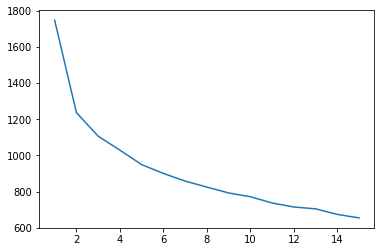

In [103]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,16), wcss)

In [104]:
model_new1=KMeans(n_clusters=3)
model_new1.fit_predict(scaled)

array([1, 1, 2, ..., 1, 0, 0])

In [105]:
Clusters_MMS = pd.DataFrame(model_new1.labels_,columns=['cluster'])
data_f2 = pd.DataFrame(np.hstack([data,Clusters_MMS]))
data_f2

,0,1,2,3,4,5,6,7,8,9,10,11
0,5524.0,0.0,1.0,58138.0,58.0,1.0,1617.0,25.0,64.0,0.0,9.0,1.0
1,2174.0,0.0,1.0,46344.0,38.0,0.0,27.0,6.0,67.0,2.0,7.0,1.0
2,4141.0,0.0,0.0,71613.0,26.0,0.0,776.0,21.0,56.0,0.0,8.0,2.0
3,6182.0,0.0,0.0,26646.0,26.0,0.0,53.0,8.0,37.0,1.0,7.0,0.0
4,5324.0,0.0,0.0,58293.0,94.0,0.0,422.0,19.0,40.0,1.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2227,10870.0,0.0,0.0,61223.0,46.0,0.0,1341.0,18.0,54.0,1.0,8.0,2.0
2228,4001.0,0.0,0.0,64014.0,56.0,1.0,444.0,22.0,75.0,3.0,7.0,0.0
2229,7270.0,0.0,1.0,56981.0,91.0,1.0,1241.0,19.0,40.0,0.0,7.0,1.0
2230,8235.0,0.0,0.0,69245.0,8.0,0.0,843.0,23.0,65.0,1.0,7.0,0.0


In [106]:
data_f2.columns = ['ID', 'Education', 'Marital_Status', 'Income', 'Recency',
       'Campaign_accepted', 'Purchase__amount', 'Total_purchase', 'Age',
       'total_kids', 'Customer_year', 'clusters']

In [107]:
data_f2

,ID,Education,Marital_Status,Income,Recency,Campaign_accepted,Purchase__amount,Total_purchase,Age,total_kids,Customer_year,clusters
0,5524.0,0.0,1.0,58138.0,58.0,1.0,1617.0,25.0,64.0,0.0,9.0,1.0
1,2174.0,0.0,1.0,46344.0,38.0,0.0,27.0,6.0,67.0,2.0,7.0,1.0
2,4141.0,0.0,0.0,71613.0,26.0,0.0,776.0,21.0,56.0,0.0,8.0,2.0
3,6182.0,0.0,0.0,26646.0,26.0,0.0,53.0,8.0,37.0,1.0,7.0,0.0
4,5324.0,0.0,0.0,58293.0,94.0,0.0,422.0,19.0,40.0,1.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2227,10870.0,0.0,0.0,61223.0,46.0,0.0,1341.0,18.0,54.0,1.0,8.0,2.0
2228,4001.0,0.0,0.0,64014.0,56.0,1.0,444.0,22.0,75.0,3.0,7.0,0.0
2229,7270.0,0.0,1.0,56981.0,91.0,1.0,1241.0,19.0,40.0,0.0,7.0,1.0
2230,8235.0,0.0,0.0,69245.0,8.0,0.0,843.0,23.0,65.0,1.0,7.0,0.0


In [108]:
data_f2.groupby(['clusters'])['clusters'].count()

clusters
0.0    860
1.0    791
2.0    581
Name: clusters, dtype: int64

<AxesSubplot:>

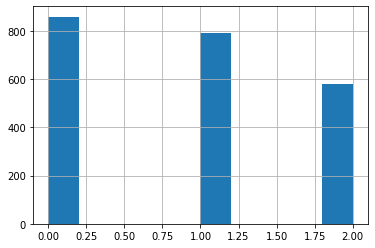

In [109]:
(data_f2["clusters"]).hist()

<AxesSubplot:xlabel='Purchase__amount', ylabel='Income'>

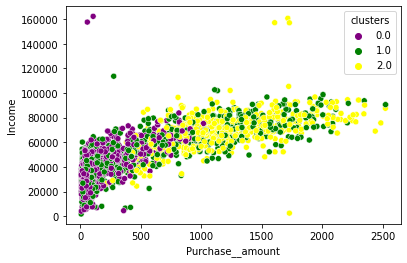

In [110]:
#Min Max Wala
sns.scatterplot(data=data_f2,y="Income",x="Purchase__amount",hue="clusters",palette=[ 'purple', 'green',  'yellow'])

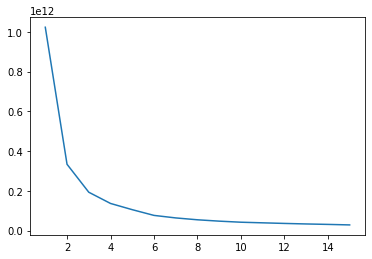

In [111]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 500102)
    kmeans.fit(data_f1)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,16), wcss)

<AxesSubplot:xlabel='Purchase__amount', ylabel='Income'>

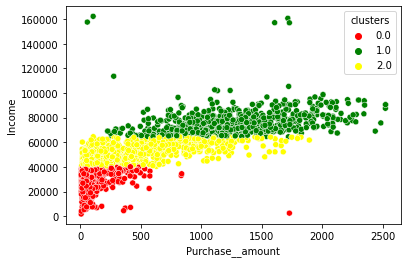

In [112]:
#Normal Data Wala
sns.scatterplot(data=data_f1,y="Income",x="Purchase__amount",hue="clusters",palette=[ 'red', 'green',  'yellow'])